# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should look like this with a cluster column at the last.                                                                                      


                                           

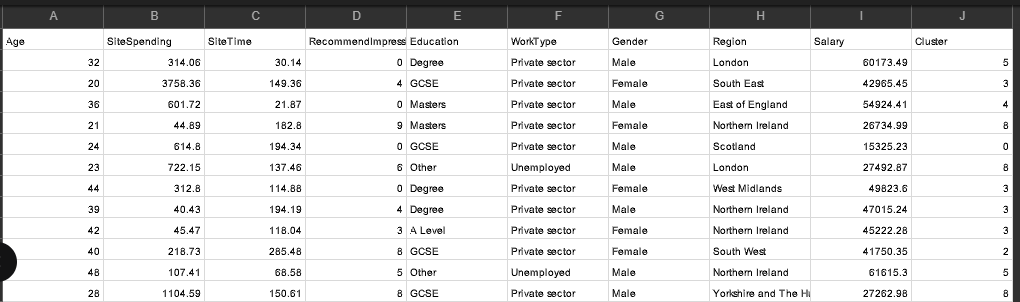

## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1 and extract predicted clusters out of it.

In [11]:
import numpy as np
import pandas as pd

In [12]:
# Load dataset from Excel file
def load_dataset(path: str) -> pd.DataFrame:
    df = pd.read_excel(path)
    return df

def preprocess_data(df: pd.DataFrame,
                    drop_cols: list = None) -> pd.DataFrame:
    processed_df = df.copy()
    if drop_cols:
        processed_df.drop(columns=drop_cols, inplace=True)

    cat_cols = processed_df.select_dtypes(include=['object', 'category']).columns.tolist()
    if cat_cols:
        processed_df = pd.get_dummies(processed_df, columns=cat_cols, drop_first=True)

    num_cols = processed_df.select_dtypes(include=[np.number]).columns.tolist()
    for col in num_cols:
        min_val = processed_df[col].min()
        max_val = processed_df[col].max()
        if max_val > min_val:
            processed_df[col] = (processed_df[col] - min_val) / (max_val - min_val)

    return processed_df


In [13]:
def kmeans_from_scratch(X: np.ndarray,
                        k: int,
                        max_iters: int = 100,
                        tol: float = 1e-4,
                        random_state: int = None) -> tuple:

    X = X.astype(float)
    if random_state is not None:
        np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for iteration in range(max_iters):

        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)


        new_centroids = np.zeros((k, n_features), dtype=float)
        for ci in range(k):
            members = X[labels == ci]
            if len(members) > 0:
                new_centroids[ci] = members.mean(axis=0)
            else:
                new_centroids[ci] = X[np.random.randint(n_samples)]

        if np.linalg.norm(new_centroids - centroids) < tol:
            centroids = new_centroids
            print(f"Converged after {iteration+1} iterations")
            break
        centroids = new_centroids

    else:
        print("Reached maximum iterations without full convergence")

    return labels, centroids


In [14]:
if __name__ == '__main__':
    DATA_PATH = 'Dataset.xlsx'
    K = 3
    MAX_ITERS = 200

    df = load_dataset(DATA_PATH)
    df_processed = preprocess_data(df)
    X = df_processed.values.astype(float)
    labels, cents = kmeans_from_scratch(
        X, k=K, max_iters=MAX_ITERS, tol=1e-4, random_state=42
    )

    df['Cluster'] = labels
    print(df.head())

Converged after 5 iterations
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        2  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        1  
4    Male          Scotland  15325.23        0  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
df = load_dataset('Dataset.xlsx')
df_enc = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=['object','category']).columns,
    drop_first=True
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_enc.values)

K = 3
MAX_ITERS = 1
kmeans = KMeans(
    n_clusters=K,
    max_iter=MAX_ITERS,
    random_state=42,
    n_init=10
)
labels = kmeans.fit_predict(X_scaled)




In [17]:

df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        1  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        1  
4    Male          Scotland  15325.23        2  


## **Part 3:**
Visualize the clusters using PCA (2D)

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:

def visualize_clusters(X, labels, title="Cluster Visualization (PCA 2D)"):
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=labels,
        cmap='viridis',
        alpha=0.7,
        edgecolor='k'
    )
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster')
    plt.tight_layout()
    plt.show()

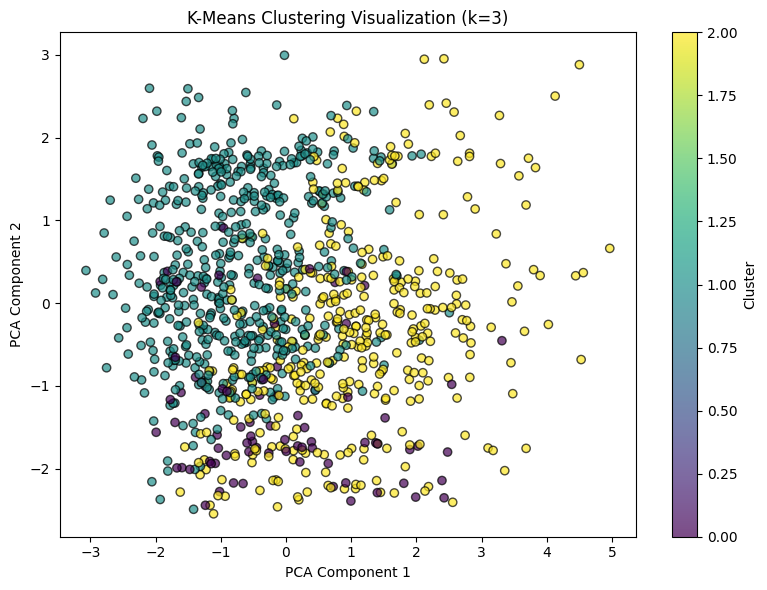

In [20]:
visualize_clusters(X_scaled, labels, "K-Means Clustering Visualization (k=3)")